## Dimensionality Reduction
* Reduces time complexity: Less computation
* Reduces space complexity: Fewer parameters
* Saves the cost of observing the feature
* Simpler models are more robust on small datasets
* More interpretable; simpler explanation
* Data visualization (structure, groups, outliers, etc) if plotted in 2 or 3 dimensions

## Feature Selection vs Extraction
**Feature Selection**: Choosing a subset of the original features. Various subset selection algorithms are used.

**Feature Extraction**: Creating new features that are combinations of all the old features. The new features are ordered by how well they help predicting the dependent variable (y). So we can reduce the dimensionality by choosing how many of the new features to keep and how many of the less important new features to delete. But eventhough we are deleting some of the new features we are still keeping most of the information because the new features are combinations of all the old features.

Feature Selection has a few advantages and disadvantages over feature extraction. The advantages of feature selection include its simplicity and its interpretability of the features. One of its disadvantages is that you lose all information from the features you dropped which possibly results in worse accuracy.

## Principal component analysis (PCA)
Principal component analysis is a technique for feature extraction. So it creates new features by combining our input features in a specific way.

1. Normalize data (0 mean and standard deviation 1)
2. Calculate covariance matrix.
3. Calculate eigen vectors and eigen values
4. Sort eigen values and their respective eigen vectors
5. Choose new dimensionality (by selecting the first k eigen vectors)
6. Transform original data

**Ways to choose the new dimensionality**
1. Select an arbitrary number of features (dimensions)
2. Select a threshold of variance to maintain and add features until you reach the threshold

## Using PCA in Scikit Learn
Scikit Learn has multiple version of PCA. It has the normal PCA, IncrementalPCA which allows for partial computations (so you don't need to load the full dataset into memory), KernelPCA which allows for non-linear dimensionality reduction through the use of kernels as well as two versions of SparsePCA which goal is the extraction of the set of sparse components that best reconstruct the data.

In [2]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
iris.head()

sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
import numpy as np

X = np.array(iris.drop(['label'], axis=1))
y = np.array(iris['label'])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components specifies the new dimensionality
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])

As you can see in the code above we are first importing PCA from sklearn.decomposition and then initializing it and setting the n_components hyperparameter to the number of dimensions we want to have. Lastly we will fit and transform our data and creating a pandas dataframe out of it so we can visualize it easier.

In [5]:
X_reduced.head()

x         y
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925

As you can see the new data doesn’t have them same meaning to a human than the old would but that isn’t a problem for a computer.


We can also print a few interesting attributes of PCA:

In [6]:
print('Components:', pca.components_)
print('Explained Variance:', pca.explained_variance_)
print('Explained Variance Ratio:', pca.explained_variance_ratio_ )

Components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Explained Variance: [4.22484077 0.24224357]
Explained Variance Ratio: [0.92461621 0.05301557]


We are creating a scatterplot. We need to pass it our data, the x and y column names which we set to x and y when we created our dataframe as well as the hue which defines the color of each datapoint. For this we will use the labels from the iris dataset.

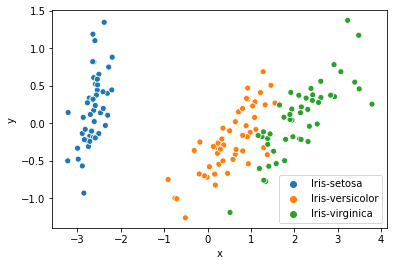

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

Now we will to the same with IncrementalPCA which has the advantage of partial computation (you don’t need to load in the whole dataset into memory).

The only difference in the code is that we need to specify another parameter called batch_size which specifies the number of samples per batch.

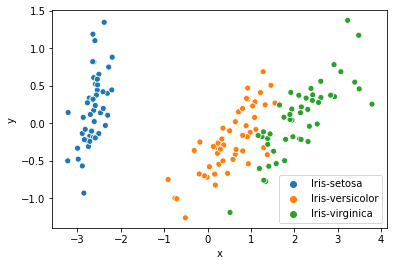

In [8]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3) # bacth_size specifies the number of samples per batch
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

As you can see the results are almost identical.

Lastly we will take a look at KernelPCA. Kernel PCA is able to find a projection of the data that makes it linearly separable.

We will use the make_circles function from sklearn.datasets to create a two dimensional datset with two classes. Then we need to transform our y values to strings because seaborns scatterplot function doesn’t support integer values for the hue parameter. After we transformed our data we will plot both the old and new data (we aren’t changing the dimensionality even though we could if we would want to do so).

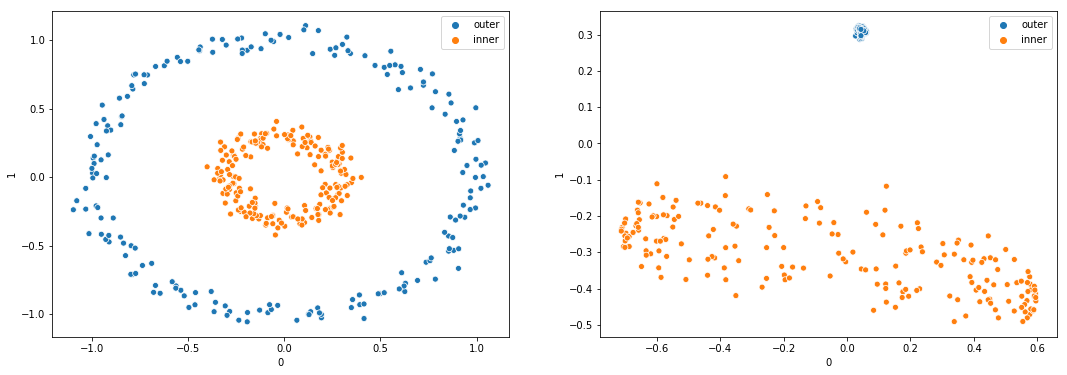

In [9]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
y = np.array(['outer' if y_==0 else 'inner' for y_ in y])
kpca = KernelPCA(kernel="rbf", gamma=10) # gamma is the Kernel coefficient.
X_kpca = kpca.fit(X).transform(X)
X_kpca = pd.DataFrame(X_kpca)
X = pd.DataFrame(X)
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.scatterplot(x=0, y=1, hue=y, data=X, ax=ax[0])
sns.scatterplot(x=0, y=1, hue=y, data=X_kpca, ax=ax[1])

As you can see in the graph KernelPCA transformed our datset so it’s linearly separable. This is useful for a lot of linear classifiers like LogisticRegression and LinearSVM.

Reference: https://gilberttanner.com/2018/09/03/scikit-learn-tutorial-8-dimensionality-reduction-with-pca/